# 4.10 Instacart Final Analysis

### Table of Contents

01. Import

02. Merging Dataframe

03. Creating charts

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing customers_orders_products.pkl dataframe
path = r'C:\Users\31622\OneDrive\Documents\Career Foundry\Career Foundry\Exercise\Exercise 4\Instacart Basket Analysis'

In [3]:
instacart_high = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_high.pkl'))

In [4]:
# Importing department data
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [5]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [6]:
# renaming Unnamed column
df_dept=df_dept.rename(columns={'Unnamed: 0' : 'department_id'})

##### 02. Merging Dataframe

In [7]:
# Merging depts with high
instacart_high_merge =instacart_high.merge(df_dept,on='department_id')

In [8]:
#export merged df
instacart_high_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_all.pkl'))

In [9]:
#import new merged df
instacart_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_all.pkl'))

In [10]:
# check merged data
instacart_all.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,Num_of_dependants,Marital_status,income,Region,customer_activity,age_group,income_group,dependant_group,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,High_active_customer,Young_Age,middle_income,Dependants,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High_active_customer,Young_Age,middle_income,Dependants,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High_active_customer,Young_Age,middle_income,Dependants,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High_active_customer,Young_Age,middle_income,Dependants,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High_active_customer,Young_Age,middle_income,Dependants,beverages


**Question 6: Visualisations

**Creating a line chart exploring the connections between age and number of dependents. using something like a scatterplot to see how they are correlated together.**

##### 03. Creating Charts

**Bar Charts of profiled groups**

In [11]:
# Check the results of age_group
instacart_all['age_group'].value_counts(dropna=False)

Middle_Age    11661944
Older_Age     10583941
Young_Age      8746779
Name: age_group, dtype: int64

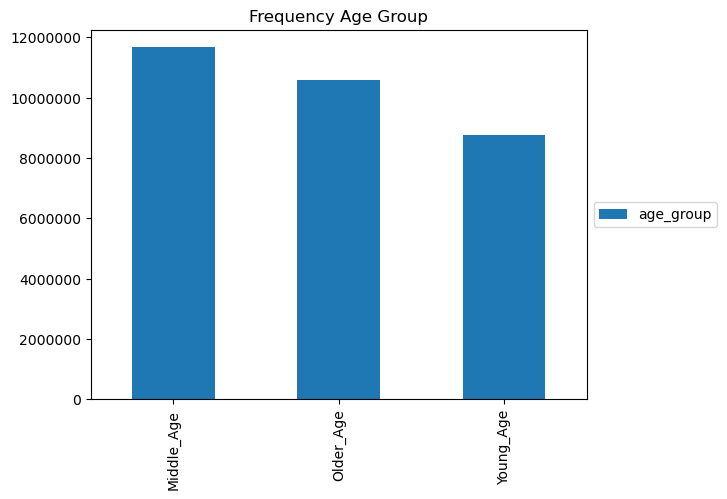

In [12]:
# Age distribution visualization - bar chart
bar_age_grouping = instacart_all['age_group'].value_counts().plot.bar()
plt.title('Frequency Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

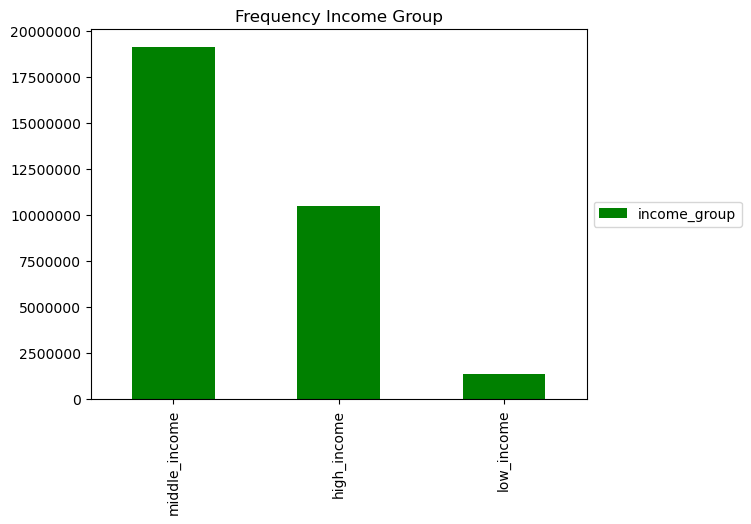

In [13]:
# Income distribution visualization 
bar_income_distribution = instacart_all['income_group'].value_counts().plot.bar(color='green')
plt.title('Frequency Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

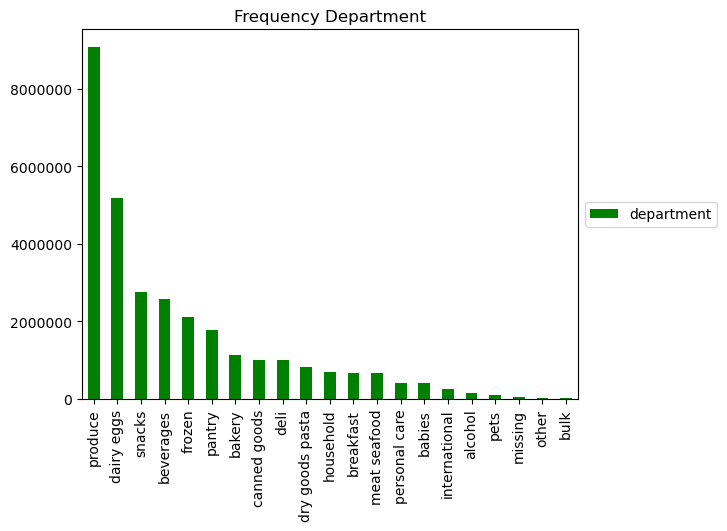

In [14]:
# Department distribution visualization 
bar_department_distribution = instacart_all['department'].value_counts().plot.bar(color='green')
plt.title('Frequency Department')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [15]:
# Check the different categories in the Family Status column

instacart_all['Marital_status'].value_counts()

married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: Marital_status, dtype: int64

In [16]:
# creating a Family Status flag 
instacart_all.loc[(instacart_all['Marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (instacart_all['Num_of_dependants']==0), 'family_status_group'] = 'Single with NO Dependants'

In [17]:
instacart_all.loc[(instacart_all['Marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (instacart_all['Num_of_dependants'] >=1), 'family_status_group'] = 'Single WITH Dependants'

In [33]:
instacart_all.loc[(instacart_all['Marital_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (instacart_all['Num_of_dependants'] == 1), 'family_status_group'] = 'Married with NO Dependants'

In [34]:
instacart_all.loc[(instacart_all['Marital_status'] == 'married') & (instacart_all['Num_of_dependants'] >= 1), 'family_status_group'] = 'Married WITH Dependants'

In [35]:
# Check outcome

instacart_all['family_status_group'].value_counts()

Married WITH Dependants       21763021
Single with NO Dependants      7747032
Single WITH Dependants          974172
Married with NO Dependants      508439
Name: family_status_group, dtype: int64

Text(137.64444444444445, 0.5, '')

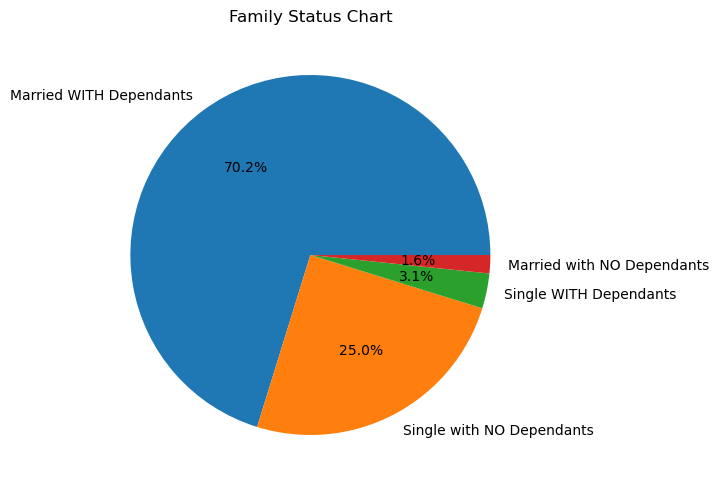

In [38]:
# Create a pie chart for the family status distribution
pie_family_status=instacart_all['family_status_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.tight_layout()

# Add a title
plt.title('Family Status Chart')
plt.xlabel('')
plt.ylabel('')


**Export visualisations**

In [39]:
bar_income_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Income_distribution_bar_chart.png'))

In [40]:
bar_age_grouping.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_grouping_bar_chart.png'))

In [41]:
bar_department_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Department_grouping_bar_chart.png'))

In [42]:
pie_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Family_status_pie_chart.png'))